### Import Libraries

In [1]:

import keras
import os 
import cv2 
import math
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout

In [2]:
data_path = '/kaggle/input/leapgestrecog/leapGestRecog'


In [3]:
IMAGE_SIZE = (64, 64)
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
        

### Loading the data

In [4]:
images = []
labels = []
for dir_name in os.listdir(data_path):
    for category in CATEGORIES:
        class_idx = CATEGORIES.index(category)
        path = os.path.join(data_path, dir_name, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                images.append(cv2.resize(img_arr, IMAGE_SIZE))
                labels.append(class_idx)
            except Exception as e:
                print(f"Error loading the data: {e}")

In [5]:
images[0]

array([[5, 5, 7, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 3],
       [5, 7, 7, ..., 5, 4, 3],
       ...,
       [6, 5, 6, ..., 5, 5, 4],
       [6, 6, 6, ..., 5, 4, 5],
       [6, 6, 6, ..., 5, 4, 5]], dtype=uint8)

In [6]:
labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
def visualize_images(images, labels, sample_size=5):
    """
    Visualizes a sample of images from the dataset.
    
    Arguments:
    images -- a numpy array of image data.
    labels -- a numpy array of labels
    sample_size -- the size of the sample
    
    """
    
    cols = min(3, sample_size)
    rows = math.ceil(sample_size / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    axes = axes.flatten()
    
    for i in range(sample_size):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(CATEGORIES[labels[i]])
        axes[i].axis('off')
    
    # Hide unused subplots
    for j in range(sample_size, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

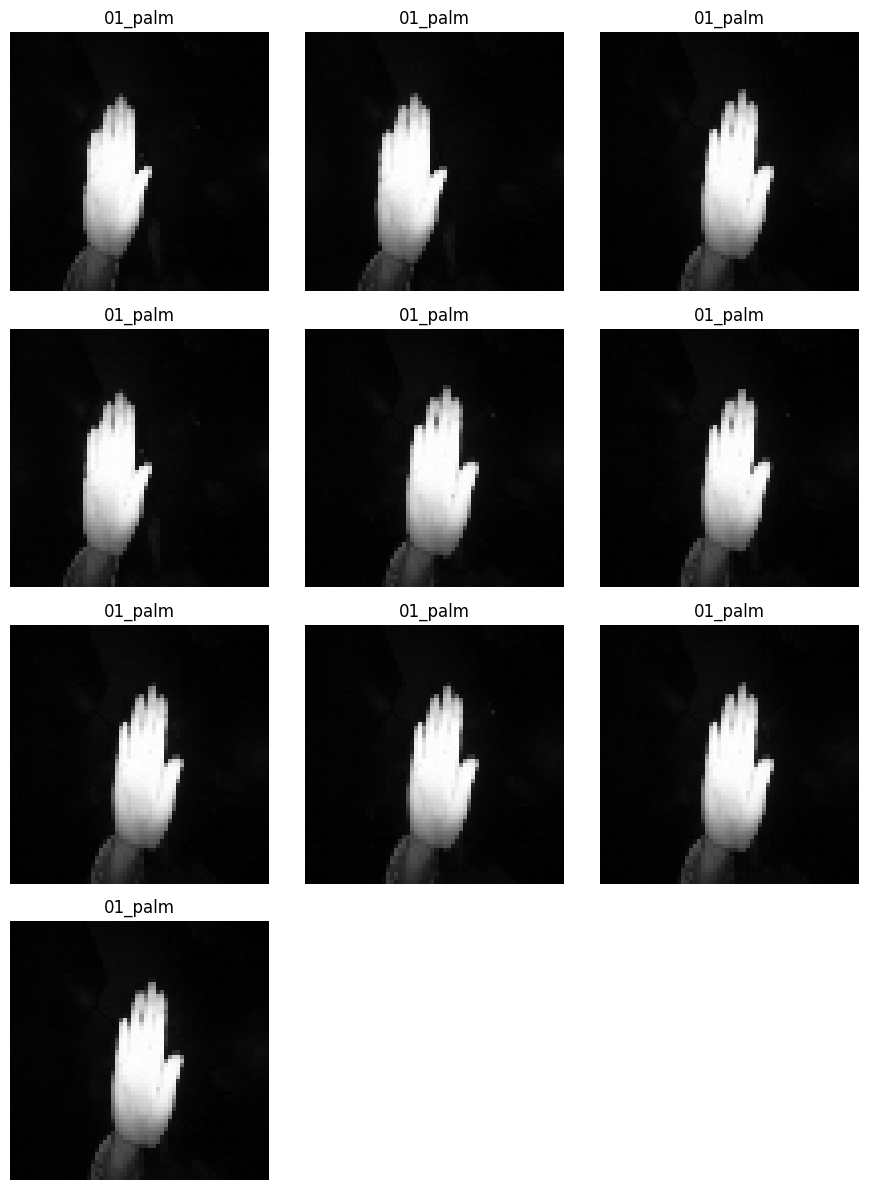

In [8]:
visualize_images(images, labels, 10)

### Data Preprocessing

In [9]:
images = np.array(images)
images = images / 255.0

images.shape

(20000, 64, 64)

In [10]:
labels = np.array(labels)
labels = keras.utils.to_categorical(labels, num_classes=10)

labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
images.shape = (-1, 64, 64, 1)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state=42)

### Modeling

In [13]:
kernel_size = (3, 3)
pool_size = (2, 2)
drop_out = 0.3

model = Sequential([
    Conv2D(filters=32, kernel_size=kernel_size, input_shape=(64, 64, 1)),
    Activation('relu'),

    Conv2D(filters=32, kernel_size=kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(drop_out),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


I0000 00:00:1724594480.597634    2509 service.cc:145] XLA service 0x7938c8013040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724594480.597678    2509 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724594480.597683    2509 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 16/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1347 - loss: 2.2723

I0000 00:00:1724594484.849632    2509 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


438/438 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7124 - loss: 0.8343
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9937 - loss: 0.0218
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9977 - loss: 0.0068
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9980 - loss: 0.0054
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9987 - loss: 0.0046
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9988 - loss: 0.0046
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9998 - loss: 5.8223e-04
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 1.3409e-04
Epoch 10/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 1.0000 - loss: 2.2720e-04


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,484,310 (24.74 MB)

 Trainable params: 3,242,154 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,242,156 (12.37 MB)

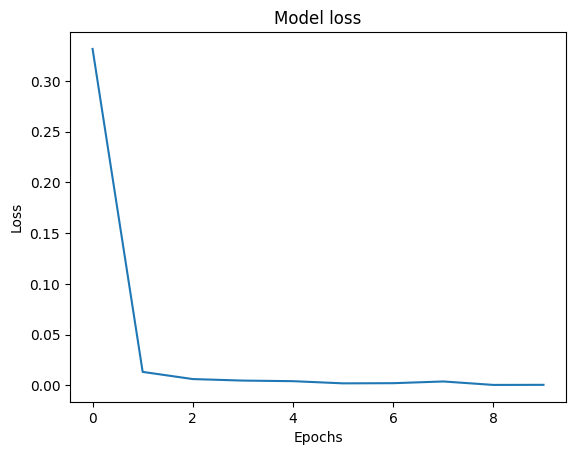

In [17]:
plt.plot(model.history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

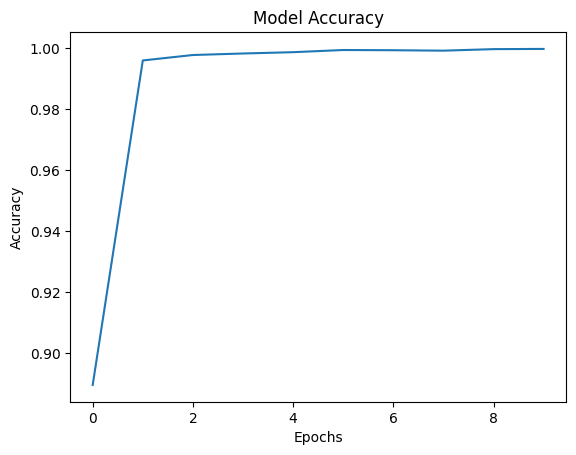

In [18]:
plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9984 - loss: 0.0095


In [20]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss: 0.006669914815574884
Test Accuracy: 0.9984999895095825
